## Problem: Intersection Plot

Write a function `get_hyperplane(b, bias=0, box=[0,0,1,1])` that computes a hyperplane in 2 dimensions, restricted to a box. More specifically, given input consisting of:

1. a vector $b \in \mathbb{R}^2$
2. a bias term $b_0 \in \mathbb{R}$
3. a box $[l_x, l_y, u_x, u_y]$ — i.e. a rectangle in $\mathbb{R}^2$, specified by a 4-tuple:

$$
[l_x, l_y, u_x, u_y] \leftrightsquigarrow [l_x, u_x] \times [l_y, u_y] = \left\{ \begin{pmatrix} x \\ y \end{pmatrix} \in \mathbb{R}^2 \mid l_x \le x \le u_x \wedge l_y \le y \le u_y  \right\}
$$

Compute the intersection points of the hyperplane $H = \{ x \mid \langle x, b \rangle + b_0 = 0 \}$ with the edges of the box. Return either:

1. Two empty vectors if the intersection is empty
2. Two vectors $X, Y$ of length 2 containing the $x$ and $y$ values of the intersection points.


Test your code by executing:

```python
from numpy.random import randn
from matplotlib import pyplot as plt
box = lx, ly, ux, uy = [-5, -2, 3, 4]
fig, ax  = plt.subplots(figsize=(16, 6))
ax.set_xlim(lx-2, ux+2)
ax.set_ylim(ly-2, uy+2)
ax.plot([lx, lx, ux, ux, lx], [ly, uy, uy, ly, ly], '--k')
for k in range(20):
    X, Y = get_hyperplane(randn(2), bias=randn(1), box=box)
    ax.plot(X, Y)


If you did everything correct the result should look like the following picture.

/var/folders/95/hw148ws149q824gl59r9kf400000gn/T/ipykernel_8136/611432987.py:14: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  bias = float(bias)


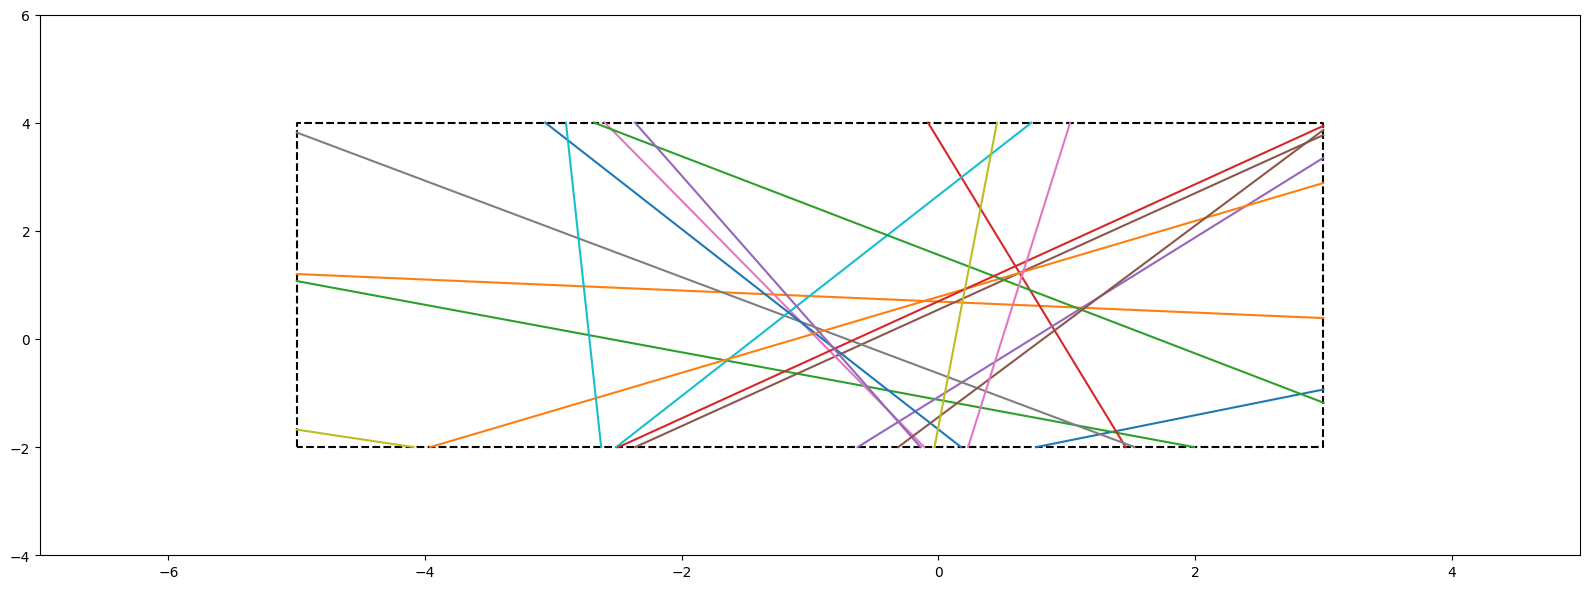

In [2]:
%matplotlib inline
import numpy as np
from numpy.random import randn
from matplotlib  import pyplot as plt

def get_hyperplane(vec, bias=0, box=[0,0,1,1]):
    """
    vec: either vector length 2
    Plot hyperplane in R^2, restricted to given box.
    H = {x| b0 + b1*x1 + b2*x2 = 0 }
    """
    lx, ly, ux, uy = box
    b1, b2 = vec
    bias = float(bias)

    def intersect_x(x):     # Solve for y given x
        if b2 != 0:
            return -(b1 * x + bias) / b2
        else:
            return None  # No intersection if parallel to y-axis
        
    def intersect_y(y):     # Solve for x given y
        if b1 != 0:
            return -(b2 * y + bias) / b1
        else:
            return None  # No intersection if parallel to x-axis
        
    points = []

    # Left edge (x = lx)
    y_left = intersect_x(lx)
    if y_left is not None and ly <= y_left <= uy:
        points.append((lx, y_left))

    # Right edge (x = ux)
    y_right = intersect_x(ux)
    if y_right is not None and ly <= y_right <= uy:
        points.append((ux, y_right))

    # Bottom edge (y = ly)
    x_bottom = intersect_y(ly)
    if x_bottom is not None and lx <= x_bottom <= ux:
        points.append((x_bottom, ly))

    # Top edge (y = uy)
    x_top = intersect_y(uy)
    if x_top is not None and lx <= x_top <= ux:
        points.append((x_top, uy))

    if len(points) < 2:
        return [], []  # No valid intersections
    else:
        X, Y = zip(*points)
        return X, Y


# use the code below to validate your plot
box = lx, ly, ux, uy = [-5, -2, 3, 4]
fig, ax  = plt.subplots(figsize=(16, 6))
ax.set_xlim(lx-2, ux+2);
ax.set_ylim(ly-2, uy+2);
ax.plot( [lx, lx, ux, ux, lx], [ly, uy, uy, ly, ly], '--k' )
for k in range(20):
    X, Y = get_hyperplane(randn(2), bias=randn(1), box=box)
    ax.plot(X, Y)
plt.tight_layout()
plt.savefig("lines_in_box.pdf")